<a href="https://colab.research.google.com/github/kishorekumar1992/kishore/blob/main/Simple_Regression_Feb_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#importing dataset
dataset = pd.read_csv('/content/Salary_Data.csv')

In [6]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
#Independent and Dependent Variable
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [10]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
X_train

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [14]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [15]:
y_train

array([112635.,  55794.,  83088., 101302.,  56642.,  66029.,  64445.,
        61111., 113812.,  91738.,  46205., 121872.,  60150.,  39891.,
        81363.,  93940.,  57189.,  54445., 105582.,  43525.,  39343.,
        98273.,  67938.,  56957.])

In [16]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [17]:
#Feature Scaling 
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [18]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train) 

LinearRegression()

In [19]:
# ?prediction the test
y_pred = regression.predict(X_test)

In [20]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [21]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error, r2_score
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
mape = mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)
rsquare = r2_score(y_true=y_test, y_pred=y_pred)


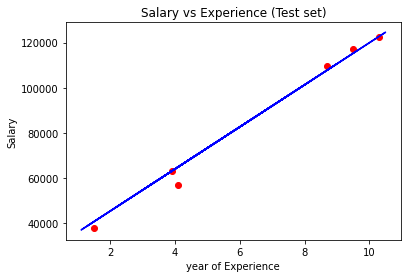

In [23]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color ='red')
plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('year of Experience')
plt.ylabel('Salary')
plt.show()

In [24]:
#Predicting for new Data Points
newdata=pd.Series([5,8,12])
data_pred=pd.DataFrame(newdata,columns=['YearExperience'])
data_pred

,YearExperience
0,5
1,8
2,12


In [25]:
regression.predict(data_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 73342.97478427, 101280.70016446, 138531.00067138])